In [1]:
import numpy as np
import pandas as pd
from datetime import date
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/pandas/compat/_optional.py:106: UserWarning: Pandas requires version '1.2.1' or newer of 'bottleneck' (version '1.2.0' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
df = pd.read_csv('/mnt/efs/data/climate_indices.csv')
df['time'] = pd.DatetimeIndex(df.time)
df = df.set_index('time')[['year','nao','ao']].loc['1990-01-01':'2018-12-31'].groupby(['year']).mean()

In [3]:
idx = pd.read_table('/mnt/efs/notebooks/04/nao_station_djfm.txt',delim_whitespace=True,header=None,skiprows=1,
                    index_col=0,names=['NAO'])

df['nao_djfm'] = idx.loc[(idx.index >= 1990)&(idx.index < 2019)].NAO

In [4]:
idx = pd.read_csv('/mnt/efs/data/convection_depth.csv').rename(columns={'Year': 'year',' Max_Depth': 'max_depth', 
                                                                        ' Max_Sigma2': 'max_sigma2'})
idx['max_depth'] = pd.to_numeric(idx['max_depth'].astype(str).str[:-1], errors='coerce')
df['lsw_depth'] = idx.set_index('year')['max_depth']

In [5]:
idx = pd.read_csv('/mnt/efs/data/aviso_adt_eof_pc_timeseries.csv')
idx['year'] = pd.DatetimeIndex(idx.time).year
df['spgi'] = idx[['year','pc02']].groupby(['year']).mean().pc02

In [6]:
idx = pd.read_csv('/mnt/efs/data/en4_sigma.csv')
idx['year'] = pd.DatetimeIndex(idx.time).year
#df['sigma'] = idx[['year','sigma_cspg']].groupby(['year']).mean().sigma_cspg
df['sigma'] = idx[['year','sigma_spg']].groupby(['year']).mean().sigma_spg

In [7]:
sig = pd.read_csv('/mnt/efs/data/sigma.csv')
sig['year'] = pd.DatetimeIndex(sig.time).year
#df['sigma_rg'] = sig[['year','sigma_cspg_300_mean']].groupby(['year']).mean().sigma_cspg_300_mean
df['sigma_rg'] = sig[['year','sigma_spg_300_mean']].groupby(['year']).mean().sigma_spg_300_mean

In [8]:
#oaf = pd.read_csv('/mnt/efs/data/oaflux_htfl_spg.csv')
oaf = pd.read_csv('/mnt/efs/data/oaflux_htfl_wspg.csv')

oaf = oaf.set_index('time').sort_index()
oaf.index = pd.DatetimeIndex(oaf.index)
oaf_3m = oaf.rolling(3,center=False).mean()
oaf_djf = oaf_3m[oaf_3m.index.month==2]
oaf_djf['year'] = oaf_djf.index.year
oaf_djf.set_index('year',inplace=True)
df['htfl'] = oaf_djf-oaf_djf.mean()

#oaf['year'] = pd.DatetimeIndex(oaf.time).year
#oaf['mon'] = pd.DatetimeIndex(oaf.time).month
#htfl = oaf.query('mon in (1,2)')[['year','htfl']].groupby(['year']).mean()
#df['htfl'] = htfl-htfl.mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
era = pd.read_csv('/mnt/efs/data/era_curl_eg_norm_djf_19892018.csv')
era.set_index('year',inplace=True)
df['wsc'] = era.curl_norm-era.curl_norm.mean()

In [19]:
df

,nao,ao,nao_djfm,lsw_depth,spgi,sigma,sigma_rg,htfl,ohc_spna,ohc_spna_eccov4,lfwc_spna,wsc
year,,,,,,,,,,,,
1990,0.606667,1.024250,3.96,1980,NaN,27.693828,NaN,NaN,-7.580621e+21,NaN,3919.637263,-0.047556
1991,0.250833,0.197000,1.03,1990,NaN,27.702527,NaN,71.370140,-5.220978e+21,NaN,2453.833743,0.777798
1992,0.537500,0.436500,3.28,2180,NaN,27.699903,NaN,48.379170,-4.971837e+21,-5.803097e+21,2757.571491,0.515014
1993,0.155000,0.079083,2.67,2300,9.120320,27.717376,NaN,55.288226,-5.389813e+21,-6.473957e+21,4746.358240,0.011159
1994,0.541667,0.532417,3.03,2300,19.829159,27.715608,NaN,5.592449,-6.647782e+21,-6.911748e+21,4925.781407,0.599343
1995,-0.093333,-0.274583,3.96,2000,16.569495,27.752453,NaN,9.238411,-7.461036e+21,-6.365358e+21,1434.231278,0.095792
1996,-0.249167,-0.456333,-3.78,1200,-9.630979,27.696540,NaN,-41.077833,-8.277703e+20,-1.450154e+21,524.665490,-0.836314
1997,-0.204167,-0.039667,-0.17,1000,-10.142677,27.693743,NaN,33.592258,8.381626e+20,1.679925e+20,-926.396874,-0.529269
1998,-0.542500,-0.271000,0.72,1000,-9.062057,27.654875,NaN,-14.499067,3.164088e+21,1.361281e+21,-1511.189580,-0.472472


In [13]:
ohc = pd.read_csv('/mnt/efs/data/hadobs_en4_hc_spna_upper700m_monthly.csv')
ohc['year'] = pd.DatetimeIndex(ohc.time).year
df['ohc_spna'] = ohc.groupby(['year']).mean()['ohc']

In [14]:
ohc = pd.read_csv('/mnt/efs/data/eccov4r4_hc_spna_upper700m_monthly.csv')
ohc['year'] = pd.DatetimeIndex(ohc.time).year
df['ohc_spna_eccov4'] = ohc.groupby(['year']).mean()['ohc']

In [15]:
lfwc = pd.read_csv('/mnt/efs/data/hadobs_en4_lfwc_spna_upper700m_monthly.csv')
lfwc['year'] = pd.DatetimeIndex(lfwc.time).year
df['lfwc_spna'] = lfwcxarray annual mean
['lfwc']

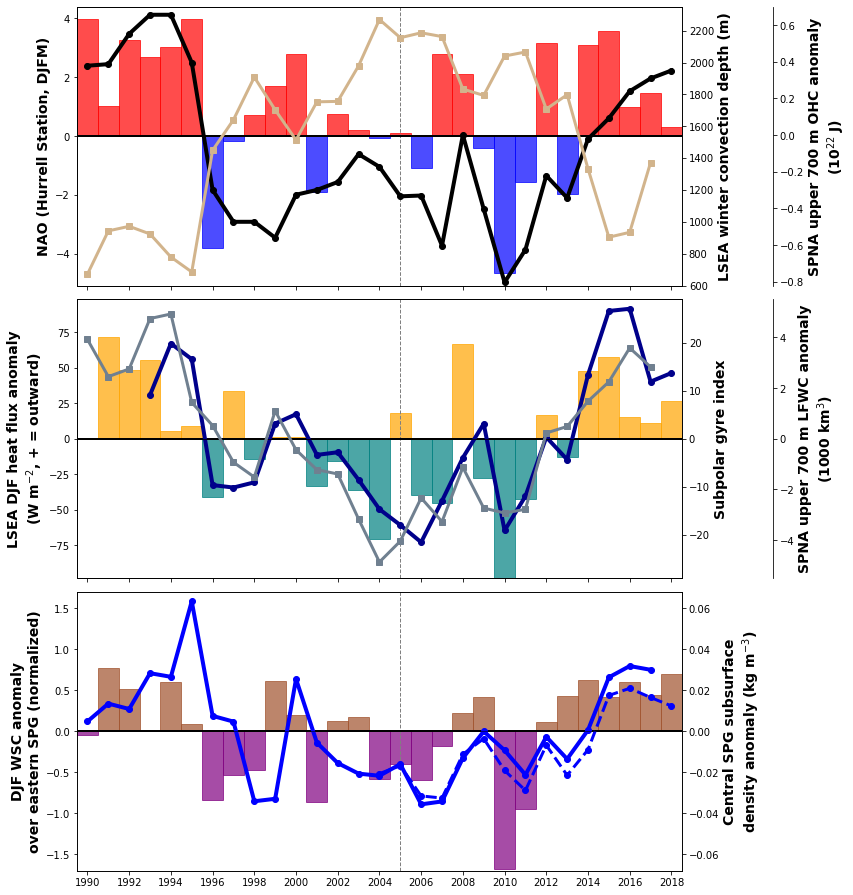

In [25]:
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(12,15))
fig.tight_layout()
fig.subplots_adjust(left=0.1, right=0.8, bottom=0.1, top=0.9, hspace=0.05)

axs[0].axvline(x=2005, color='gray', lw=1, linestyle='--')
axs[0].bar(df.index, np.clip(df.nao_djfm.values,0,np.nan), 1, align='center', color='red', edgecolor='red', 
           alpha=0.7, label=None, zorder=0)
axs[0].bar(df.index, np.clip(df.nao_djfm.values,np.nan,0), 1, align='center', color='blue', edgecolor='blue', 
           alpha=0.7,label=None,zorder=0)
axs[0].axhline(y=0, xmin=0, xmax=1, linewidth=2, color = 'k')
axs[0].set_xlim([1989.5,2018.5])
axs[0].set_xticks(np.arange(1990,2020,2))
axs[0].set_ylabel(r'NAO (Hurrell Station, DJFM)', fontsize=14, color='k', fontweight='bold')

axa = axs[0].twinx()
axa.plot(df.index, df['lsw_depth'], lw=4, color='k', linestyle='-', marker='o')
axa.set_xlim([1989.5,2018.5])
axa.set_ylim([600,2350])
axa.set_ylabel(r'LSEA winter convection depth (m)', fontsize=14, fontweight='bold')

axb = axs[0].twinx()
axb.spines['right'].set_position(('axes', 1.15))
axb.axhline(y=0, xmin=0, xmax=1, linewidth=0.5, color = 'k')
axb.plot(df.index, df['ohc_spna']*1e-22, lw=3, color='tan', linestyle='-', marker='s')
axb.set_xlim([1989.5,2018.5])
axb.set_ylim([-0.82,0.7])
axb.set_ylabel('SPNA upper 700 m OHC anomaly\n(10$^{22}$ J)', fontsize=14, color='k', fontweight='bold')

axs[1].axvline(x=2005, color='gray', lw=1, linestyle='--')
axs[1].bar(df.index, np.clip(df.htfl.values,0,np.nan), 1, align='center', color='orange', edgecolor='orange', 
           alpha=0.7, label=None, zorder=0)
axs[1].bar(df.index, np.clip(df.htfl.values,np.nan,0), 1, align='center', color='teal', edgecolor='teal', 
           alpha=0.7,label=None,zorder=0)
axs[1].axhline(y=0, xmin=0, xmax=1, linewidth=2, color = 'k')
axs[1].set_xlim([1989.5,2018.5])
axs[1].set_xticks(np.arange(1990,2020,2))
axs[1].set_ylim([-98,98])
axs[1].set_ylabel('LSEA DJF heat flux anomaly\n(W m$^{-2}$, + = outward)', fontsize=14, color='k', fontweight='bold')

axc = axs[1].twinx()
axc.plot(df.index, df['spgi'], lw=4, color='darkblue', linestyle='-', marker='o')
axc.axhline(y=0, xmin=0, xmax=1, linewidth=0.5, color = 'k')
axc.set_xlim([1989.5,2018.5])
axc.set_ylim([-29,29])
axc.set_xticks(np.arange(1990,2020,2))
axc.set_ylabel(r'Subpolar gyre index', fontsize=14, color='k', fontweight='bold')

axd = axs[1].twinx()
axd.spines['right'].set_position(('axes', 1.15))
axd.axhline(y=0, xmin=0, xmax=1, linewidth=0.5, color = 'k')
axd.plot(df.index, df['lfwc_spna']*1e-3, lw=3, color='slategrey', linestyle='-', marker='s')
axd.set_xlim([1989.5,2018.5])
axd.set_ylim([-5.5,5.5])
#axd.set_ylabel(r'LSEA upper 700 m OHC (10$^{21}$ J)', fontsize=14, color='grey')
axd.set_ylabel('SPNA upper 700 m LFWC anomaly\n(1000 km$^3$)', fontsize=14, color='k', fontweight='bold')

axs[2].axvline(x=2005, color='gray', lw=1, linestyle='--')
axs[2].bar(df.index, np.clip(df.wsc.values,0,np.nan), 1, align='center', color='sienna', edgecolor='sienna', 
           alpha=0.7, label=None, zorder=0)
axs[2].bar(df.index, np.clip(df.wsc.values,np.nan,0), 1, align='center', color='purple', edgecolor='purple', 
           alpha=0.7,label=None,zorder=0)
axs[2].axhline(y=0, xmin=0, xmax=1, linewidth=2, color = 'k')
axs[2].set_xlim([1989.5,2018.5])
axs[2].set_xticks(np.arange(1990,2020,2))
axs[2].set_ylim([-1.7,1.7])
#axs[2].set_ylabel('DJF WSC anomaly\nover eastern SPG ($\mu$Pa m$^{-1}$)', fontsize=14, color='k', fontweight='bold')
axs[2].set_ylabel('DJF WSC anomaly\nover eastern SPG (normalized)', fontsize=14, color='k', fontweight='bold')

axe = axs[2].twinx()
axe.plot(df.index, df['sigma']-df.sigma.mean(), lw=4, color='blue', linestyle='-', marker='o')
axe.plot(df.index, df['sigma_rg']-df.sigma.mean(), lw=3, color='blue', linestyle='--', marker='o')

axe.axhline(y=0, xmin=0, xmax=1, linewidth=0.5, color = 'k')
axe.set_xlim([1989.5,2018.5])
axe.set_ylim([-0.068,0.068])
axe.set_xticks(np.arange(1990,2020,2))
axe.set_ylabel('Central SPG subsurface\ndensity anomaly (kg m$^{-3}$)', fontsize=14, color='k', fontweight='bold')

plt.savefig('/mnt/efs/figure.png')
plt.show()

In [13]:
df['htfl_lsea'] = pd.read_csv('/mnt/efs/data/oaflux_htfl_lsea.csv', index_col=0).htfl

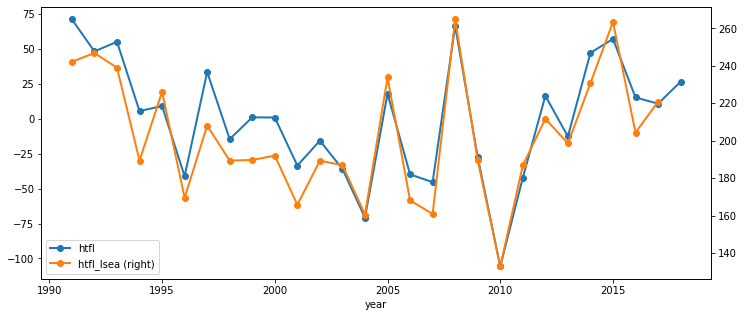

In [18]:
df[['htfl','htfl_lsea']].plot(secondary_y=['htfl_lsea'],figsize=(12,5),marker='o',lw=2)

In [19]:
df[['htfl','htfl_lsea']].corr()

,htfl,htfl_lsea
htfl,1.00000,0.93804
htfl_lsea,0.93804,1.00000


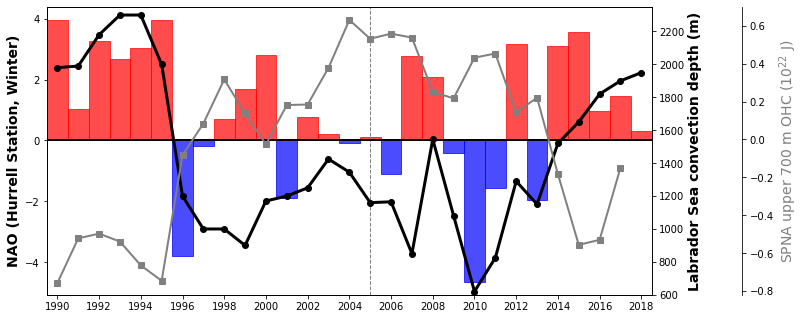

In [11]:
fig, ax = plt.subplots(figsize=(12,5))
fig.subplots_adjust(left=0.1, right=0.8, bottom=0.1, top=0.9)

ax.axvline(x=2005, color='gray', lw=1, linestyle='--')
ax.bar(df.index, np.clip(df.nao_djfm.values,0,np.nan), 1, align='center', color='red', edgecolor='red', 
           alpha=0.7, label=None, zorder=0)
ax.bar(df.index, np.clip(df.nao_djfm.values,np.nan,0), 1, align='center', color='blue', edgecolor='blue', 
           alpha=0.7,label=None,zorder=0)
ax.axhline(y=0, xmin=0, xmax=1, linewidth=2, color = 'k')
ax.set_xlim([1989.5,2018.5])
ax.set_xticks(np.arange(1990,2020,2))
ax.set_ylabel(r'NAO (Hurrell Station, Winter)', fontsize=14, color='k', fontweight='bold')

axa = ax.twinx()
axa.plot(df.index, df['lsw_depth'], lw=3, color='k', linestyle='-', marker='o')
axa.set_xlim([1989.5,2018.5])
axa.set_ylim([600,2350])
axa.set_ylabel(r'Labrador Sea convection depth (m)', fontsize=14, fontweight='bold')

axb = ax.twinx()
axb.spines['right'].set_position(('axes', 1.15))
axb.axhline(y=0, xmin=0, xmax=1, linewidth=0.5, color = 'k')
axb.plot(df.index, df['ohc_spna']*1e-22, lw=2, color='grey', linestyle='-', marker='s')
axb.set_xlim([1989.5,2018.5])
axb.set_ylim([-0.82,0.7])
axb.set_ylabel(r'SPNA upper 700 m OHC (10$^{22}$ J)', fontsize=14, color='grey')

plt.savefig('/mnt/efs/figure.png')
plt.show()